In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack
import numpy as np
import ipywidgets as widgets


In [3]:
df = pd.read_csv('processed_data.csv')
df.index = pd.to_datetime(df.localminute)

In [4]:
df

,localminute,26,59,77,86,93,101,114,115,171,...,9926,9932,9935,9937,9938,9939,9942,9971,9982,9983
localminute,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,2016-01-01 00:00:00+00:00,0.519,1.176,0.665,0.469,0.710,0.133,1.006,0.139,0.457,...,1.271,0.309,16.743,0.253,3.842,0.850,0.745,17.473,0.327,1.181
2016-01-01 00:01:00+00:00,2016-01-01 00:01:00+00:00,0.519,2.585,0.584,0.468,0.648,0.127,1.004,0.140,0.570,...,1.243,0.310,0.929,0.253,3.965,0.848,0.689,17.482,0.323,1.204
2016-01-01 00:02:00+00:00,2016-01-01 00:02:00+00:00,0.518,2.581,0.551,0.467,0.604,0.129,1.001,0.140,0.963,...,1.297,0.308,0.953,0.253,4.014,0.844,0.556,17.493,0.326,1.224
2016-01-01 00:03:00+00:00,2016-01-01 00:03:00+00:00,0.519,2.574,0.525,0.466,0.605,0.130,0.999,0.140,0.987,...,1.268,0.309,1.011,0.253,4.035,0.842,0.607,17.138,0.320,1.236
2016-01-01 00:04:00+00:00,2016-01-01 00:04:00+00:00,0.518,2.597,0.594,0.465,0.604,0.129,0.998,0.140,0.920,...,1.248,0.309,1.005,0.253,4.174,0.817,0.610,17.177,0.319,1.229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-30 04:55:00+00:00,2016-04-30 04:55:00+00:00,NaN,NaN,NaN,0.466,NaN,0.312,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-30 04:56:00+00:00,2016-04-30 04:56:00+00:00,NaN,NaN,NaN,0.465,NaN,0.311,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-30 04:57:00+00:00,2016-04-30 04:57:00+00:00,NaN,NaN,NaN,0.464,NaN,0.324,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Avg. load of the residents across the entire timespan
resd_avg = df.mean(0)
resd_avg

26      0.867036
59      1.509194
77      1.306753
86      1.141629
93      0.643963
          ...   
9939    0.969390
9942    0.774734
9971    0.594323
9982    0.474241
9983    1.224176
Length: 346, dtype: float64

<AxesSubplot:>

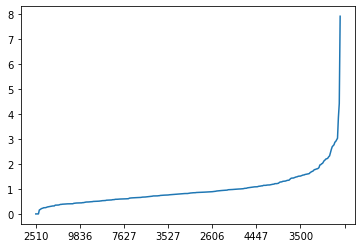

In [7]:
# Average load with incresingly power-consuming residents
resd_avg.sort_values().plot()

[]

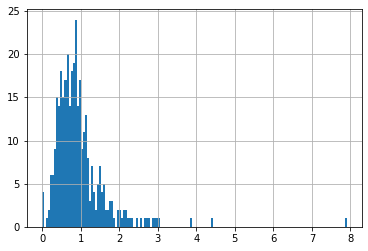

In [8]:
# Distribution of average load w.r.t. residents
# horizontal: avg. load w.r.t. residents
# vertical: count
resd_avg.hist(bins=150).plot()

<AxesSubplot:xlabel='localminute'>

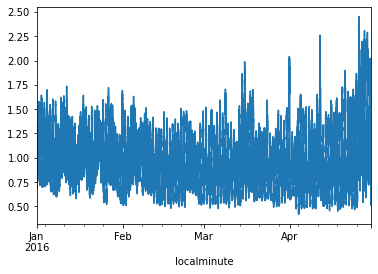

In [9]:
# Avg. load at different time across all residents 
# (Nans are automatically filled with column avg.)
min_avg = df.mean(axis=1)
min_avg.plot()

<AxesSubplot:xlabel='localminute'>

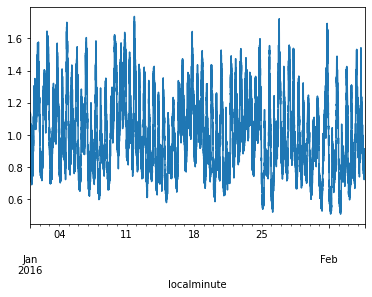

In [14]:
min_avg.iloc[:50000].plot()  # A vague weekly cycle?

<AxesSubplot:xlabel='localminute'>

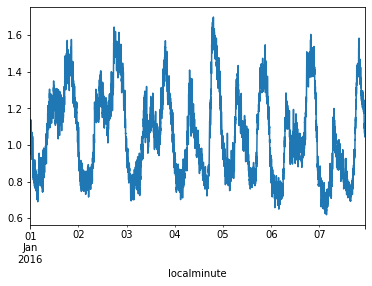

In [15]:
min_avg.iloc[:10000].plot()  # A daily cycle

In [241]:
# Let's do an FFT!

In [312]:
min_avg_fft = sp.fftpack.fft(np.array(min_avg)[:90800])
min_avg_psd = np.abs(min_avg_fft) ** 2

Text(0, 0.5, 'PSD')

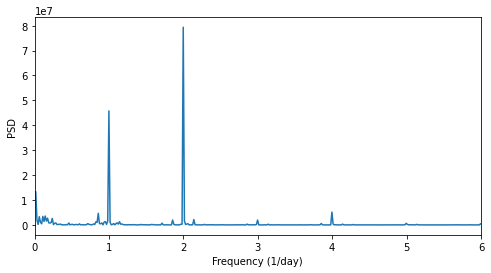

In [317]:
# A frequency of 1 corresponds to a day (60 * 24 min)
fftfreq_day = sp.fftpack.fftfreq(len(min_avg_psd), 1./60/24)

i = fftfreq_day > 0
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq_day[i], min_avg_psd[i])
ax.set_xlim(0, 6)
ax.set_xlabel('Frequency (1/day)')
ax.set_ylabel('PSD')

In [314]:
# SURPRISE! what's that twice-a-day pattern???

In [41]:
@widgets.interact(resident=(1, 149))
def resd_fft(resident):
    resd = df.iloc[:, resident]
    fft = sp.fftpack.fft(np.array(resd)[:90800])
    psd = np.abs(fft) ** 2
    # A frequency of 1 corresponds to a day (60 * 24 min)
    fftfreq_day = sp.fftpack.fftfreq(len(psd), 1./60/24)
    postive = fftfreq_day > 0
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(fftfreq_day[postive], psd[postive])
    ax.set_xlim(0, 2.5)
    ax.set_xlabel('Frequency (1/day)')
    ax.set_ylabel('PSD')

interactive(children=(IntSlider(value=75, description='resident', max=149, min=1), Output()), _dom_classes=('w…

Text(0, 0.5, 'PSD')

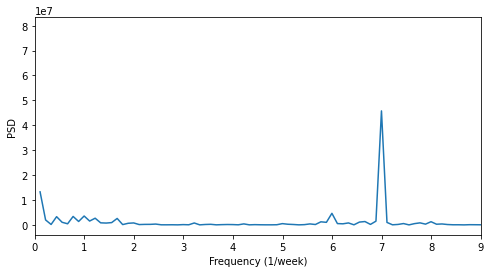

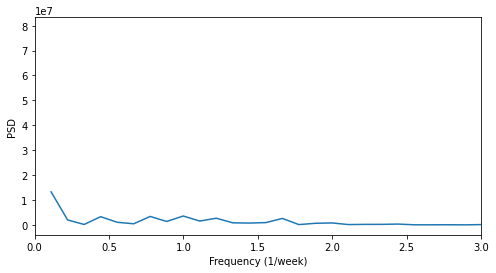

In [315]:
# A frequency of 1 corresponds to a week (60 * 24 * 7 min)
fftfreq_week = sp.fftpack.fftfreq(len(min_avg_psd), 1./60/24/7)

i = fftfreq_week > 0
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq_week[i], min_avg_psd[i])
ax.set_xlim(0, 9)
ax.set_xlabel('Frequency (1/week)')
ax.set_ylabel('PSD')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq_week[i], min_avg_psd[i])
ax.set_xlim(0, 3)
ax.set_xlabel('Frequency (1/week)')
ax.set_ylabel('PSD')

In [ ]:
# The weekly pattern is pretty weak compared to the daily one

<AxesSubplot:>

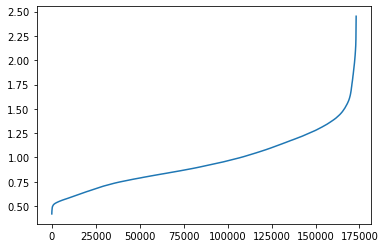

In [341]:
# Incremental of average load with time (minute) as horizontal axis
sorted_min_avg = min_avg.sort_values()
sorted_min_avg.reset_index().iloc[:, 1].plot()

[]

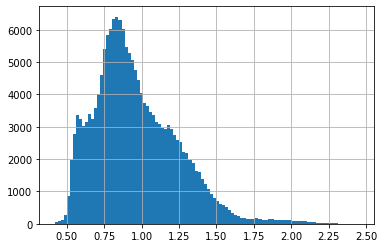

In [343]:
# Distribution of average load  w.r.t. time
# horizontal: avg. load w.r.t. time
# vertical: count of minutes
min_avg.hist(bins=100).plot()